<a href="https://colab.research.google.com/github/SanjanSRao/Colab_Start/blob/Linear_Reg/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook on simple Linear regression


FOR SLR steps to be followed:


*   Read and Understand Data.
*   Train Model.
*   Residul Analysis.
*   Predicting and evaluating on test data.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv(r'/content/drive/MyDrive/Colab_Upgrad/advertising.csv')

In [3]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


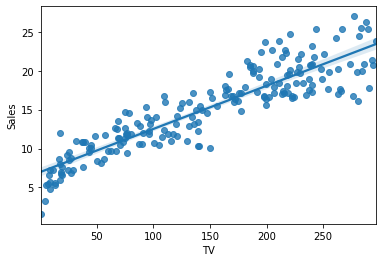

In [7]:
sns.regplot(x='TV', y='Sales', data=advertising)

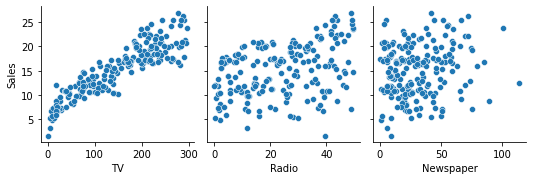

In [8]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', diag_kind = None)

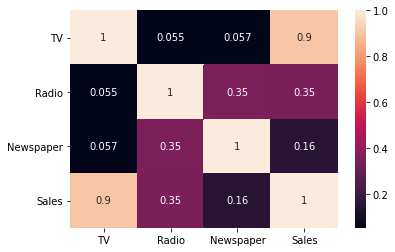

In [9]:
sns.heatmap(advertising.corr(), annot=True)

y = m * TV + c


m values are called model coefficients or model parameters

In [10]:
import statsmodels.api as sm
import statsmodels
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**STEPS:**


*   Create X and y.
*   Create train and test set.
*   Train model on training set(i.e, learn the coefficients)
*   Evaluate the model(training set, test set)











In [11]:
# create X and y
X = advertising['TV']
y = advertising['Sales']

In [12]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [13]:
X_train.shape

(140,)

In [14]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
169,1.0,284.3
97,1.0,184.9
31,1.0,112.9
12,1.0,23.8
35,1.0,290.7


In [15]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    7.206555
TV       0.054835
dtype: float64

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.08e-50
Time:                        09:08:21   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.000       6.387       8.026
TV             0.0548      0.002     23.467      0.000       0.050       0.059
==============================================================================
Omnibus:                        1.138   Durbin-Watson:                   2.351
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.240
Skew:                          -0.190   Prob(JB):                        0.538
Kurtosis:                       2.739   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

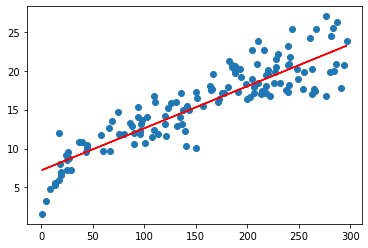

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.206 + 0.054 * X_train, 'r')
plt.show()

# **Residual Analysis**

In [18]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

169    22.796112
97     17.345525
31     13.397413
12      8.511625
35     23.147055
         ...    
106     8.577427
14     18.398354
92     19.144109
179    16.287211
102    22.571289
Length: 140, dtype: float64

In [19]:
residuals = y_train - y_train_pred

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

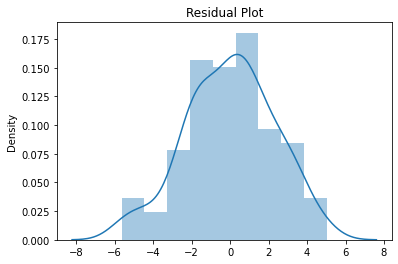

In [20]:
# plot residuals
plt.figure()
sns.distplot(residuals)
plt.title("Residual Plot")

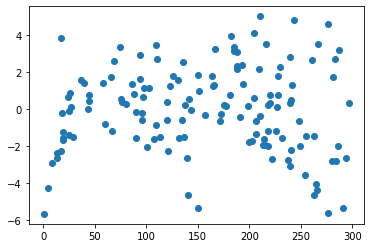

In [21]:
# look for patterns
plt.scatter(X_train, residuals)


In [22]:
# Predictions

In [23]:
# make predictions on test set (y_test_pred)
# evaluate model, r-squared, on test

In [24]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [25]:
y_test_pred

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
115    11.324654
69     19.094757
170     9.948299
174    19.401833
45     16.808143
66      8.933853
182    10.288275
165    20.065335
78      7.502663
186    14.856021
177    16.539452
56      7.606849
152    18.041928
82     11.335621
68     20.224356
124    19.791160
16     10.924360
148     9.290280
93     20.964627
65     10.990162
60     10.140221
84     18.913802
67     14.845054
125    11.988156
132     7.667168
9      18.162564
18     11.001129
55     18.113213
75      8.133264
150    22.598706
104    20.268224
135     9.855079
137    22.214862
164    13.633203
76      8.714514
79     13.567401
197    16.912329
38      9.569938
24     10.622768
122    19.489569
195     9.301247
29     11.077897
19     15.283733
143    12.942283
86     11.390456
114    11.494642
173    16.440749
5       7.683618
126     7.634267
117    11.395940
73     14.302189
140    11.231435
98     23.092220
172     8.2813

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
# evaluate using r-sqaured
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)

In [28]:
r2

0.814855389208679

In [29]:
r2_score(y_train, y_train_pred)

0.799626928219267

In [30]:
# mean squared error

In [31]:
mean_squared_error(y_test, y_test_pred)

5.179525402166655

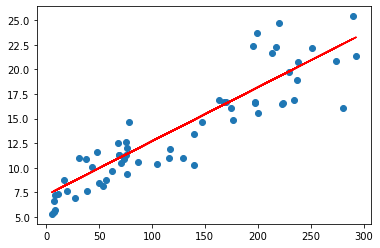

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Linear Regression using sklearn

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [40]:
# steps in sklearn model building
# 1. Create an object of linear regression
# 2. Fit the model
# 3. See params, make predictions 
# 4. Evaluate the model (r2, etc.)

In [41]:
from sklearn.linear_model import LinearRegression
lr_sklearn = LinearRegression()

In [42]:
# reshape X_train to (m, 1)

X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [43]:
lr_sklearn.fit(X_train_lm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lr_sklearn.coef_

array([0.05483488])

In [45]:
lr_sklearn.intercept_

7.206554548173251

In [46]:
y_train_pred = lr_sklearn.predict(X_train_lm)

In [47]:
y_test_pred = lr_sklearn.predict(X_test_lm)

In [48]:
# Evaluate

r2_score(y_train, y_train_pred)

0.799626928219267

In [49]:
r2_score(y_test, y_test_pred)

0.814855389208679

A quick recap of simple linear regression
Assumptions of simple linear regression
Linear relationship between X and y.
Normal distribution of error terms.
Independence of error terms.
Constant variance of error terms.
Hypothesis testing in linear regression
To determine the significance of beta coefficients.
H
0
:
β
1
=
0
;
H
A
:
β
1
≠
0
. 
T-test on the beta coefficient.
tscore =
^
β
i / 
S
E
(
^
β
i
)
.
Building a linear model
OLS (Ordinary Least Squares) method in statsmodels to fit a line.
Summary statistics
F-statistic, r-squared, coefficients and their p-values.
Residual Analysis
Histogram of the error terms to check normality.
Plot of the error terms with X or y to check independence.
Predictions
Making predictions on the test set using the 'predict()' function.
Linear Regression using SKLearn
A second package apart from statsmodels for linear regression.
A more hassle-free package to just fit a line without any inferences.
